# IMPORTING LIBRARRIES

In [1]:
#import warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# DATA READING AND DATA UNDERSTANDING FOR APPLICATION DATASET

In [3]:
#reading data set of application in inp0.
inp0= pd.read_csv("application_data.csv")

In [4]:
#checking shape of inp0
inp0.shape

(307511, 122)

In [5]:
#checking info
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
#getting brief idea of column names
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
#printing first 5 columns of dataframe
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# DATA CLEANING FOR APPLICATION DATASET

In [8]:
#checking missing values in all columns
inp0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
inp0.isnull().sum().values

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,     12,    278,   1292,      0,      0,      0,      0,
            0,      0,      0,      0,      0, 202929,      0,      0,
            0,      0,      0,      0,  96391,      2,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0, 173378,    660,  60965, 156061, 179943, 150007, 204488,
       214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350,
       213514, 169682, 156061, 179943, 150007, 204488, 214865, 163891,
       154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682,
       156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020,
       208642, 182590, 210199, 154350, 213514, 169682, 210295, 154297,
       148431, 156341, 145755,   1021,   1021,   1021,   1021,      1,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [10]:
#calculating value of 40% of data 
0.4*307511

123004.40000000001

In [11]:
#finding number of columns which have more than 40% data missing
null_col= inp0.isnull().sum()
null_col=null_col[null_col.values>(0.4*307511)]
len(null_col)

49

In [12]:
null_col.index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [13]:
list1=list(null_col.index)

In [14]:
#dropping columns which have more than 40% data missing with the help of list created
inp0.drop(labels=list1,axis=1,inplace=True)

In [15]:
#verifying shape of inp0
inp0.shape

(307511, 73)

In [16]:
#verifying info of inp0
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [17]:
#checking list of columns to find out unwanted columns
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [18]:
#making a list of unwanted columns
list2=[ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

In [19]:
#dropping columns which are unwanted with the help of list created
inp0.drop(labels=list2,axis=1,inplace=True)

In [20]:
#verifying shape of inp0
inp0.shape

(307511, 32)

In [21]:
#checking again for missing values
inp0.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
REG_CITY_NOT_LIVE_CITY             0
R

In [22]:
#HANDLING MISSING VALUE IN AMT_ANNUITY
#checking data type of AMT_ANNUITY and decribing it
inp0['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [23]:
#Replacing missing values in AMT_ANNUITY with median since data is skewed
med=inp0['AMT_ANNUITY'].median()
inp0['AMT_ANNUITY'].fillna(med,inplace=True)


In [24]:
#checking for null values in AMT_ANNUITY
inp0['AMT_ANNUITY'].isnull().sum()

0

In [25]:
#HANDLING MISSING VALUE IN AMT_GOODS_PRICE
#checking data type of AMT_GOODS_PRICE and decribing it
inp0['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [26]:
#Replacing missing values in AMT_GOODS_PRICE with median since data is skewed
med2=inp0['AMT_GOODS_PRICE'].median()
inp0['AMT_GOODS_PRICE'].fillna(med2,inplace=True)

In [27]:
#checking for null values in AMT_GOODS_PRICE
inp0['AMT_GOODS_PRICE'].isnull().sum()

0

In [28]:
#HANDLING MISSING VALUE IN NAME_TYPE_SUITE
#checking data type of NAME_TYPE_SUITE  and decribing it
inp0['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [29]:
inp0['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [30]:
#Replacing missing values in NAME_TYPE_SUITE with mode since it is a categorical data
mod=inp0['NAME_TYPE_SUITE'].mode()[0]
inp0['NAME_TYPE_SUITE'].fillna(mod,inplace=True)

In [31]:
#checking for null values in 'NAME_TYPE_SUITE'
inp0['NAME_TYPE_SUITE'].isnull().sum()

0

In [32]:
#HANDLING MISSING VALUE IN OCCUPATION_TYPE
#checking data type of OCCUPATION_TYPE and decribing it
inp0['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [33]:
#Replacing missing values in OCCUPATION_TYPE with 'Missing' since there are many missing values, it is better to keep those values instead of replacing it 
inp0['OCCUPATION_TYPE'].fillna('Missing',inplace=True)

In [34]:
inp0['OCCUPATION_TYPE'].value_counts()

Missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [35]:
#Since there are more missing values in OCCUPATION_TYPE column than other values, dropping OCCUPATION_TYPE column 
inp0.drop('OCCUPATION_TYPE',axis=1,inplace=True)

In [36]:
#verifying shape of inp0
inp0.shape

(307511, 31)

In [37]:
#HANDLING MISSING VALUE IN DEF_30_CNT_SOCIAL_CIRCLE
#checking data type of DEF_30_CNT_SOCIAL_CIRCLE and decribing it
inp0['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [38]:
#Replacing missing values in DEF_30_CNT_SOCIAL_CIRCLE with median since data is skewed
med3=inp0['DEF_30_CNT_SOCIAL_CIRCLE'].median()
inp0['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(med3,inplace=True)

In [39]:
#checking for null values in DEF_30_CNT_SOCIAL_CIRCLE
inp0['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [40]:
#HANDLING MISSING VALUE IN DEF_60_CNT_SOCIAL_CIRCLE
#checking data type of DEF_60_CNT_SOCIAL_CIRCLE and decribing it
inp0['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [41]:
#Replacing missing values in DEF_60_CNT_SOCIAL_CIRCLE with median since data is skewed
med4=inp0['DEF_60_CNT_SOCIAL_CIRCLE'].median()
inp0['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(med4,inplace=True)

In [42]:
#checking for null values in DEF_60_CNT_SOCIAL_CIRCLE
inp0['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [43]:
#HANDLING MISSING VALUE IN CNT_FAM_MEMBERS
#checking data type of CNT_FAM_MEMBERS  and decribing it
inp0['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [44]:
#Replacing missing values in CNT_FAM_MEMBERS with median since data is skewed
med5=inp0['CNT_FAM_MEMBERS'].median()
inp0['CNT_FAM_MEMBERS'].fillna(med5,inplace=True)

In [45]:
#checking for null values in CNT_FAM_MEMBERS
inp0['CNT_FAM_MEMBERS'].isnull().sum()

0

In [46]:
#checking again for missing values in all columns
inp0.isnull().sum().sum()

0

In [49]:
#CHECKING FOR DISGUISED MISSING VALUES
#finding number of unique values in each column
inp0.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
NAME_EDUCATION_TYPE                 5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_SOCIAL_CIRCLE           10
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
ORGANIZATION_TYPE                  58
REGION_POPULATION_RELATIVE         81
AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
DAYS_ID_PUBLISH                  6168
DAYS_EMPLOYE

In [59]:
#creating a list of columns which are categorical variables and numerical variables
cat_col=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE']


In [60]:
len(cat_col)

16

In [61]:
#checking for disguised missing values such as blank strings,"NA", "XX", "999", etc in categorical variables
for c in cat_col:
    print('.....................\n',c,'\n.....................')
    print(inp0[c].value_counts())

.....................
 NAME_CONTRACT_TYPE 
.....................
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
.....................
 CODE_GENDER 
.....................
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
.....................
 FLAG_OWN_CAR 
.....................
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
.....................
 FLAG_OWN_REALTY 
.....................
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
.....................
 NAME_TYPE_SUITE 
.....................
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
.....................
 NAME_INCOME_TYPE 
.....................
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemplo

In [62]:
#From above output we can observe that CODE_GENDER and ORGANIZATION_TYPE columns have 'XNA' values

In [63]:
#Replacing 'XNA' value in CODE_GENDER with mode value
mod=inp0['CODE_GENDER'].mode()[0]
inp0['CODE_GENDER']=inp0['CODE_GENDER'].replace('XNA',mod)
inp0['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [64]:
#Replacing 'XNA' value in ORGANIZATION_TYPE with 'Missing'
inp0['ORGANIZATION_TYPE']=inp0['ORGANIZATION_TYPE'].replace('XNA','Missing')
inp0['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Missing                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [65]:
#Renaming column values of ORGANIZATION_TYPE to a general category
#for example,(Business Entity Type 1,Business Entity Type 2,Business Entity Type 3) to Business Entity
#Similarly for Trade,Transport,Industry
inp0['ORGANIZATION_TYPE']= inp0['ORGANIZATION_TYPE'].replace(['Business Entity Type 1', 'Business Entity Type 2', 'Business Entity Type 3'], "Business Entity")

In [66]:
inp0['ORGANIZATION_TYPE']= inp0['ORGANIZATION_TYPE'].replace(['Trade: type 1', 'Trade: type 2', 'Trade: type 3', 'Trade: type 4', 'Trade: type 5', 'Trade: type 6', 'Trade: type 7'], "Trade")
inp0['ORGANIZATION_TYPE']= inp0['ORGANIZATION_TYPE'].replace(['Transport: type 1', 'Transport: type 2','Transport: type 3', 'Transport: type 4'], "Transport")
inp0['ORGANIZATION_TYPE']= inp0['ORGANIZATION_TYPE'].replace(['Industry: type 1', 'Industry: type 2', 'Industry: type 3', 'Industry: type 4', 'Industry: type 5', 'Industry: type 6', 'Industry: type 7', 'Industry: type 8', 'Industry: type 9', 'Industry: type 10', 'Industry: type 11', 'Industry: type 12', 'Industry: type 13'], "Industry")

In [67]:
inp0['ORGANIZATION_TYPE'].value_counts()

Business Entity        84529
Missing                55374
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion      

In [68]:
#Checking for duplicate values in SK_ID_CURR column
duplicate = inp0[inp0.duplicated(['SK_ID_CURR'])]
 
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE]
Index: []

[0 rows x 31 columns]


In [69]:
#There are no duplicate values in SK_ID_CURR

In [70]:
#checking for negative values
inp0[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


In [71]:
#Changing the negative values into absolute values for columns DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH and changing the values into years
inp0['DAYS_BIRTH']=(inp0['DAYS_BIRTH'].abs()/365).astype(int)
inp0['DAYS_EMPLOYED']=(inp0['DAYS_EMPLOYED'].abs()/365).astype(int)
inp0['DAYS_REGISTRATION']=(inp0['DAYS_REGISTRATION'].abs()/365).astype(int)
inp0['DAYS_ID_PUBLISH']=(inp0['DAYS_ID_PUBLISH'].abs()/365).astype(int)

In [72]:
#verification
inp0[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.435968,185.021521,13.168683,7.713474
std,11.954593,381.972190,9.646841,4.134515
min,20.000000,0.000000,0.000000,0.000000
25%,34.000000,2.000000,5.000000,4.000000
50%,43.000000,6.000000,12.000000,8.000000
75%,53.000000,15.000000,20.000000,11.000000
max,69.000000,1000.000000,67.000000,19.000000


In [73]:
#Changing the column names of columns DAYS_BIRTH to AGE, DAYS_EMPLOYED to YEARS_EMPLOYED, DAYS_REGISTRATION to YEARS_REGISTRATION and DAYS_ID_PUBLISH to YEARS_ID_PUBLISH
inp0.rename(columns={'DAYS_BIRTH':'AGE','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace=True)

In [74]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'AGE',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [77]:
#creating a list of numerical continuous variables to check for outliers
num_col=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'AGE','YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH','CNT_FAM_MEMBERS','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

In [78]:
len(num_col)

13

In [87]:
#describing num_col to check for outliers
inp0[num_col].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,43.435968,185.021521,13.168683,7.713474,2.152664,0.142944,0.099717
std,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,11.954593,381.972190,9.646841,4.134515,0.910679,0.446033,0.361735
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.000000,2.000000,5.000000,4.000000,2.000000,0.000000,0.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.000000,6.000000,12.000000,8.000000,2.000000,0.000000,0.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.000000,15.000000,20.000000,11.000000,3.000000,0.000000,0.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.000000,1000.000000,67.000000,19.000000,20.000000,34.000000,24.000000


In [88]:
#Defining function for boxplot to find out outliers
def box_plot(c):
    sns.boxplot(inp0[c])
    plt.xlabel(c)
    plt.title("Statistical Distribution of "+c)
    plt.xticks(rotation=45)
    plt.show()

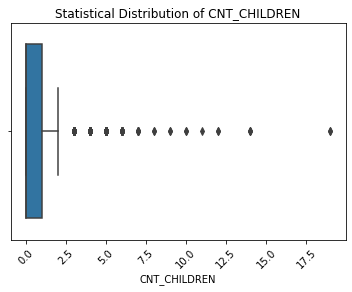

In [89]:
#Finding outliers for 'CNT_CHILDREN' using box_plot function
box_plot('CNT_CHILDREN')

In [90]:
#From above graph and describe(),we can observe that CNT_CHILDREN has many outliers and one of them
#is equal to 19 which maybe a mistake while entering data

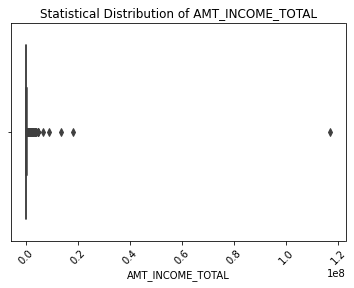

In [91]:
#Finding outliers for 'AMT_INCOME_TOTAL' using box_plot function
box_plot('AMT_INCOME_TOTAL')

In [133]:
#Observing range of data values in AMT_INCOME_TOTAL from above and from describe()
#Since it will be hard for us to analyse data values
#creating bins to create new column
bins1 = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
label1 = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000','200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000','375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','>=500000']

inp0['AMT_INCOME_RANGE']=pd.cut(inp0['AMT_INCOME_TOTAL'],bins1,labels=label1,include_lowest = True)

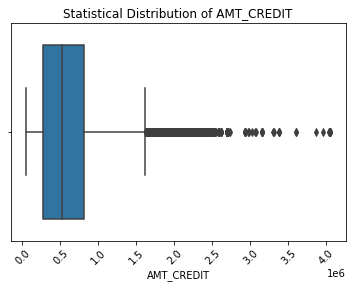

In [93]:
#Finding outliers for 'AMT_CREDIT' using box_plot function
box_plot('AMT_CREDIT')

In [94]:
#Observing range of data values in AMT_CREDIT from above and from describe()
#Since it will be hard for us to analyse data values
#creating bins to create new column
bins2 = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
label2 = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','>=900000']

inp0['AMT_CREDIT_RANGE']=pd.cut(inp0['AMT_CREDIT'],bins=bins2,labels=label2,include_lowest = True)

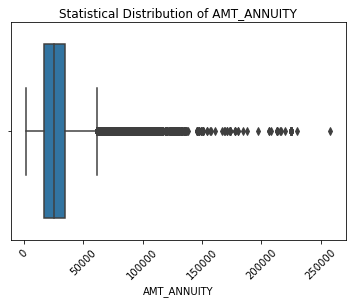

In [96]:
#Finding outliers for 'AMT_ANNUITY' using box_plot function
box_plot('AMT_ANNUITY')

In [97]:
#From above graph and describe(),we can observe that AMT_ANNUITY has many outliers 

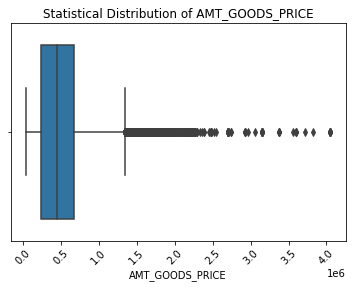

In [98]:
#Finding outliers for 'AMT_GOODS_PRICE' using box_plot function
box_plot('AMT_GOODS_PRICE')

In [99]:
#From above graph and describe(),we can observe that AMT_GOODS_PRICE has many outliers

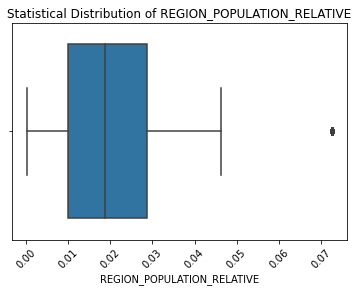

In [100]:
#Finding outliers for 'REGION_POPULATION_RELATIVE' using box_plot function
box_plot('REGION_POPULATION_RELATIVE')

In [101]:
#From above graph and describe(),we can observe that REGION_POPULATION 
#has ONLY 1 outlier equal to 0.072508

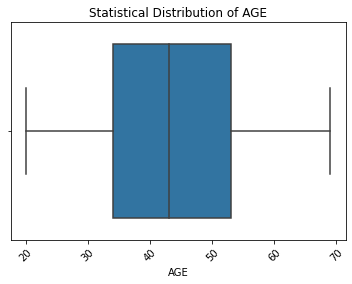

In [102]:
#Finding outliers for 'AGE' using box_plot function
box_plot('AGE')

In [103]:
#From above graph and describe(),we can observe that AGE has no outliers 

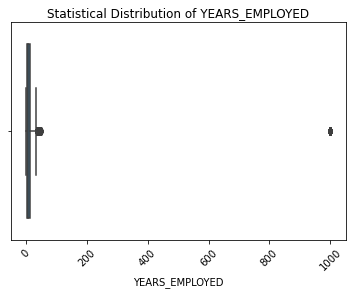

In [104]:
#Finding outliers for 'YEARS_EMPLOYED' using box_plot function
box_plot('YEARS_EMPLOYED')

In [105]:
#From above graph and describe(),we can observe that YEARS_EMPLOYED has many outliers and one of them
#is equal to 1000 which is not possible and hence may be a mistake

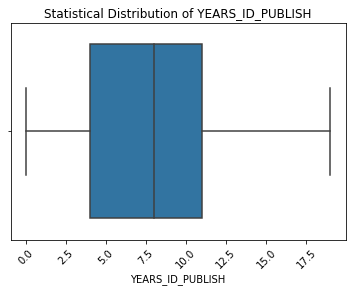

In [106]:
#Finding outliers for 'YEARS_ID_PUBLISH' using box_plot function
box_plot('YEARS_ID_PUBLISH')

In [107]:
#From above graph and describe(),we can observe that YEARS_ID_PUBLISH has no outliers

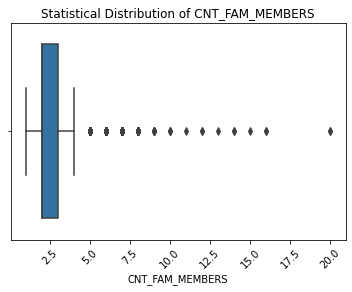

In [108]:
#Finding outliers for 'CNT_FAM_MEMBERS' using box_plot function
box_plot('CNT_FAM_MEMBERS')

In [109]:
#From above graph and describe(),we can observe that CNT_FAM_MEMBERS has many outliers and one of them
#is equal to 20 which seems to be not possible and hence may be a mistake

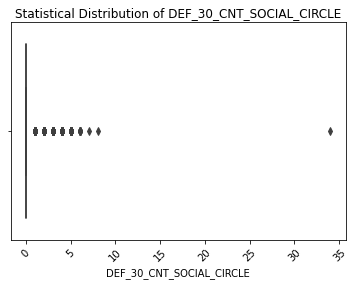

In [110]:
#Finding outliers for 'DEF_30_CNT_SOCIAL_CIRCLE' using box_plot function
box_plot('DEF_30_CNT_SOCIAL_CIRCLE')

In [111]:
#From above graph and describe(),we can observe that 'DEF_30_CNT_SOCIAL_CIRCLE' has many outliers and one of them
#is equal to 34 which seems to be not possible and hence may be a mistake

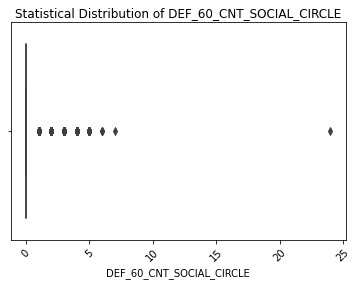

In [112]:
#Finding outliers for 'DEF_60_CNT_SOCIAL_CIRCLE' using box_plot function
box_plot('DEF_60_CNT_SOCIAL_CIRCLE')

In [369]:
#From above graph and describe(),we can observe that 'DEF_60_CNT_SOCIAL_CIRCLE' has many outliers and one of them
#is equal to 24 which seems to be not possible and hence may be a mistake

In [114]:
inp0.shape

(307511, 33)

# CHECKING FOR DATA IMBALANCE

In [115]:
#Checking for data imbalance for TARGET variable
inp0['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [116]:
#We can observe from above output that there is data imbalance.

In [117]:
#We can create two separate dataframes to perform proper analysis.
#Creating a separate dataframe for target value equal to 0 i.e. all other cases 
inp0_t0 = inp0[inp0['TARGET']==0]
inp0_t0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,MONDAY,0,0,0,School,0.0,0.0,250000-275000,>=900000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2,MONDAY,0,0,0,Government,0.0,0.0,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,WEDNESDAY,0,0,0,Business Entity,0.0,0.0,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2,THURSDAY,0,1,1,Religion,0.0,0.0,100000-125000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,2,WEDNESDAY,0,0,0,Other,0.0,0.0,"75000,100000",450000-500000


In [118]:
#checking shape of inp0_t0
inp0_t0.shape

(282686, 33)

In [119]:
#Creating a separate dataframe for target value equal to 1 i.e. client with payment difficulties
inp0_t1 = inp0[inp0['TARGET']==1]
inp0_t1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,WEDNESDAY,0,0,0,Business Entity,2.0,2.0,200000-225000,400000-450000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,2,MONDAY,0,0,0,Business Entity,1.0,0.0,100000-125000,>=900000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,2,TUESDAY,0,0,0,Business Entity,0.0,0.0,200000-225000,>=900000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,3,THURSDAY,0,0,0,Self-employed,0.0,0.0,125000-150000,250000-300000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,2,THURSDAY,0,0,0,Missing,1.0,1.0,"75000,100000",250000-300000


In [120]:
#checking shape of inp0_t1
inp0_t1.shape

(24825, 33)

In [121]:
#DATA IMBALANCE RATIO
#Data imbalnce ratio can be calculated by finding ratio of the number of instances in the majority class to the number of instances in the minority class
len(inp0_t0)/len(inp0_t1)

11.387150050352467

# UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES FOR EACH TARGET

In [125]:
#Creating function for countplot for UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES FOR EACH TARGET
def count_plot(i):
    
    plt.rcParams["figure.figsize"] = [12, 6]
    plt.rcParams["figure.autolayout"] = True
    graph1=plt.subplot(1,2,1)
    sns.countplot(data=inp0_t0,y=i,order=inp0_t0[i].value_counts().index)
    plt.xlabel('count')
    plt.title('Count Distribution of '+i+' \nfor target=0')
   #compare
    plt.subplot(1,2,2)
    graph2=sns.countplot(data=inp0_t1,y=i,order=inp0_t1[i].value_counts().index)
    plt.xlabel('count')
    plt.title('Count Distribution of '+i+' \nfor target=1')

    plt.show()

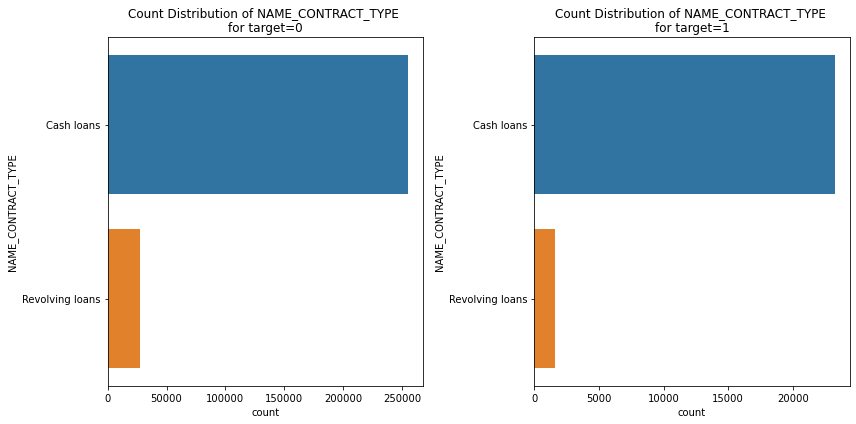

In [126]:
count_plot('NAME_CONTRACT_TYPE')
#From below graph we can observe that most of the loans applied were of type cash loans.

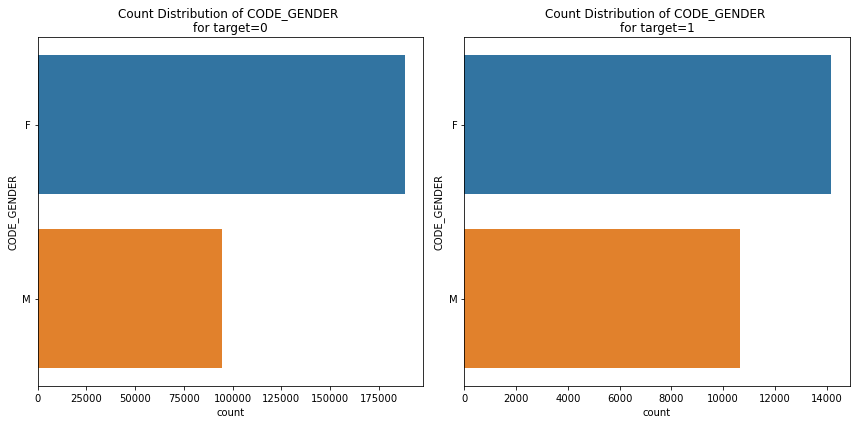

In [135]:
count_plot('CODE_GENDER')
#From below graph we can observe that most of the loans were applied by females.

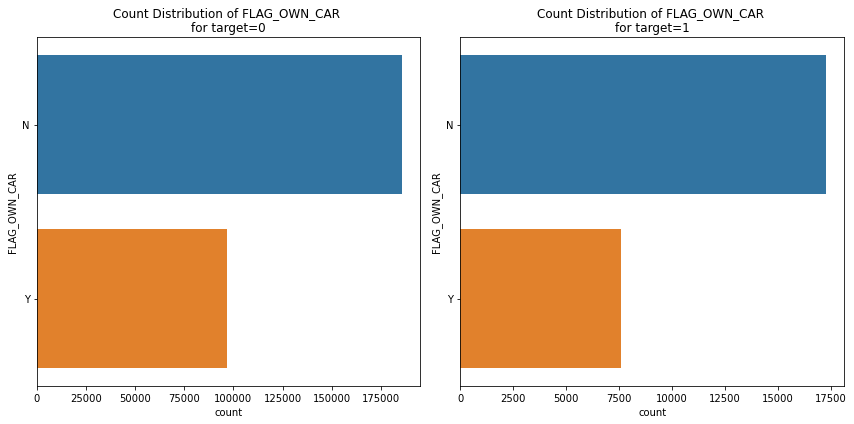

In [136]:
count_plot('FLAG_OWN_CAR')
#From below graph we can observe that most of the people who applied for loan do not own a car.

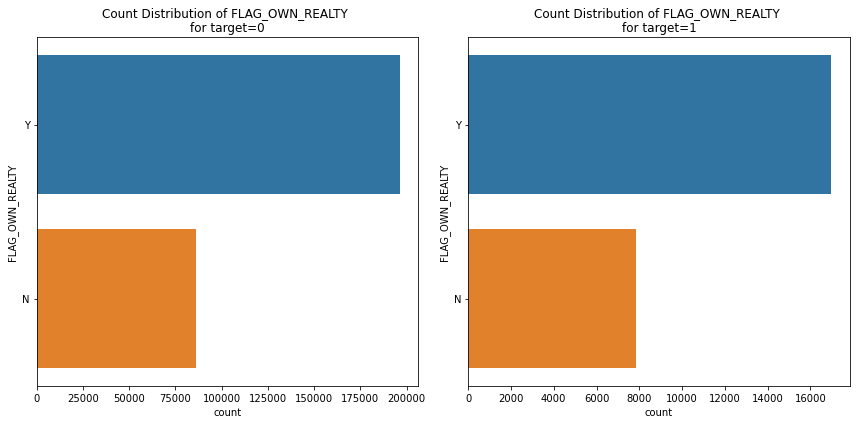

In [137]:
count_plot('FLAG_OWN_REALTY')
#From below graph we can observe that most of the people who applied for loan own a house/flat. 

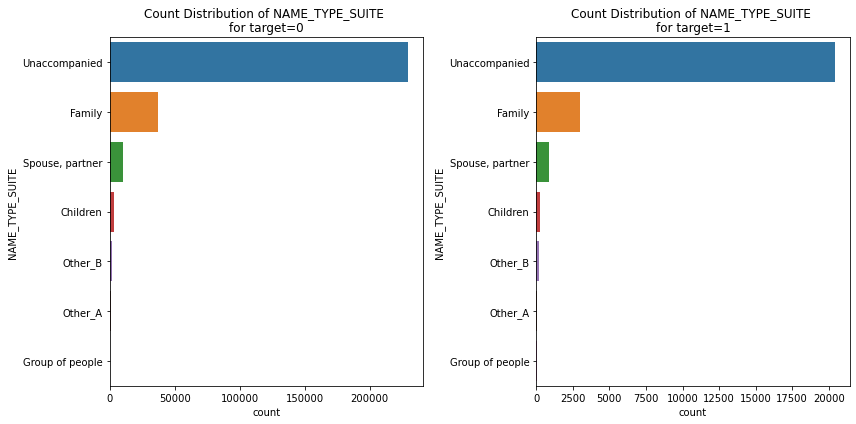

In [138]:
count_plot('NAME_TYPE_SUITE')
#From below graph we can observe that most of the people who applied for loan do not own a car.

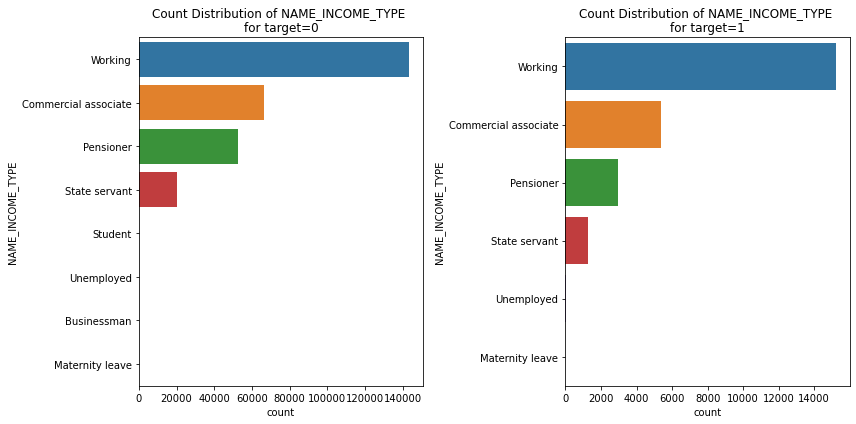

In [139]:
count_plot('NAME_INCOME_TYPE')
#From below graph we can observe that most of the people who applied for loans are working.

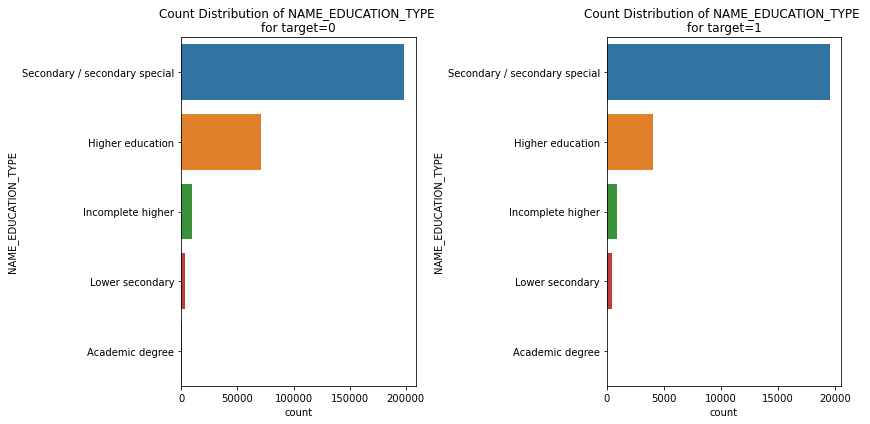

In [140]:
count_plot('NAME_EDUCATION_TYPE')
#From below graph we can observe that most of the people who applied for loans have secondary/secondary special education.

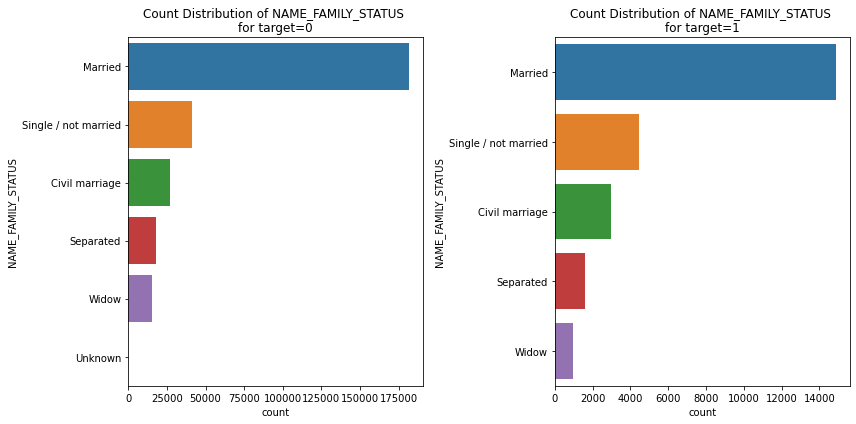

In [141]:
count_plot('NAME_FAMILY_STATUS')
#From below graph we can observe that most of the people who applied for loans are married.

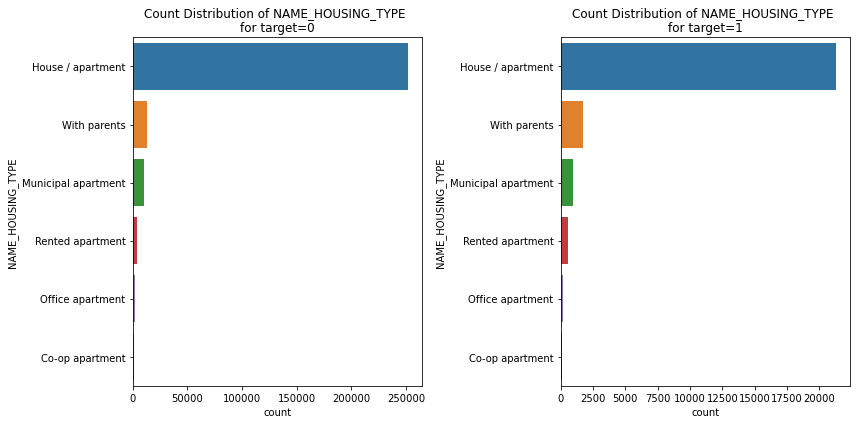

In [142]:
count_plot('NAME_HOUSING_TYPE')
#From below graph we can observe that most of the people who applied for loans live in house/apartment.

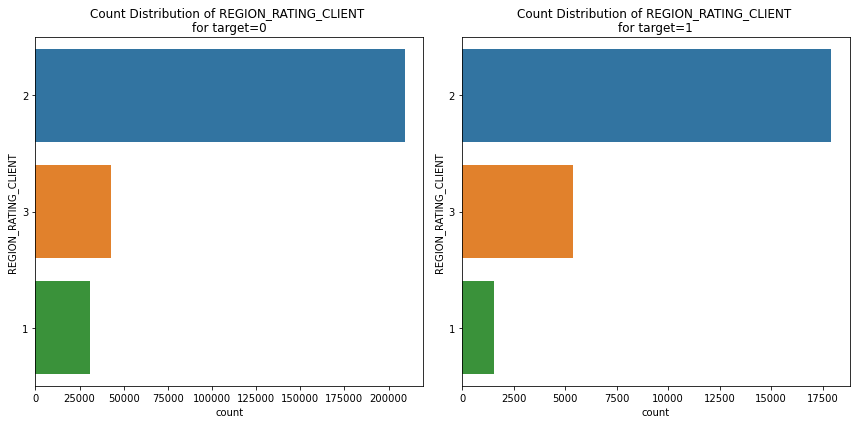

In [143]:
count_plot('REGION_RATING_CLIENT')
#From below graph we can observe that most of the people who applied for loans are from region 2
#whereas least loans are applied from region 1

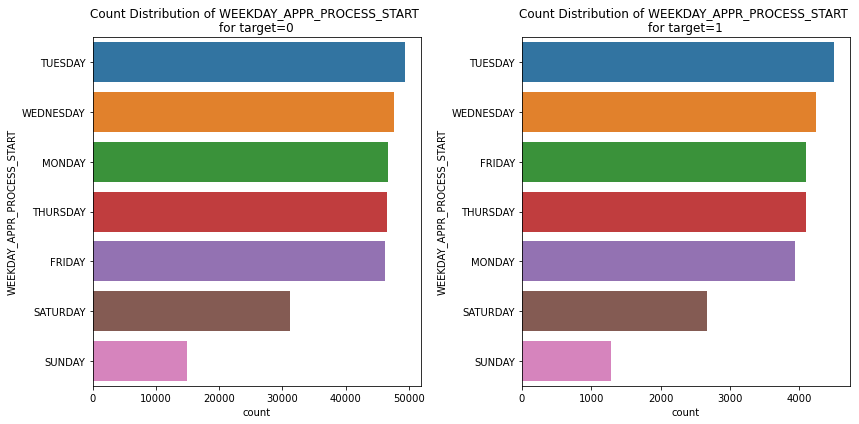

In [145]:
count_plot('WEEKDAY_APPR_PROCESS_START')
#From below graph we can observe that most of the people applied for loans on Tuesday
#whereas least amount of loans where applied on Sunday.This maybe because banks are closed on Sunday

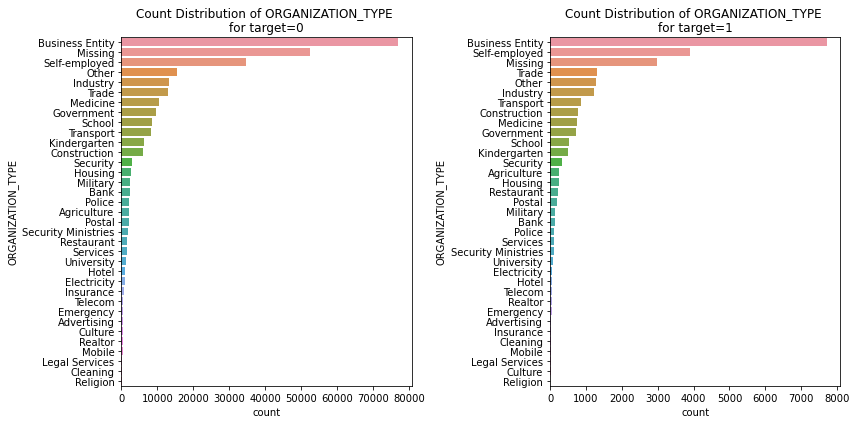

In [146]:
count_plot('ORGANIZATION_TYPE')
#From below graph we can observe that most of the people who applied for loans are from Business Entity
#whereas least amount of loans are applied from organization of religion

# UNIVARIATE ANALYSIS FOR ORDERED CATEGORICAL VARIABLES

In [186]:
def histplot1(l):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.histplot(inp0_t0[l],bins=10)
    plt.title('For target=0')

    #compare
    plt.subplot(1,2,2)
    sns.histplot(inp0_t1[l],bins=10)
    plt.title('For target=1')
    plt.show()

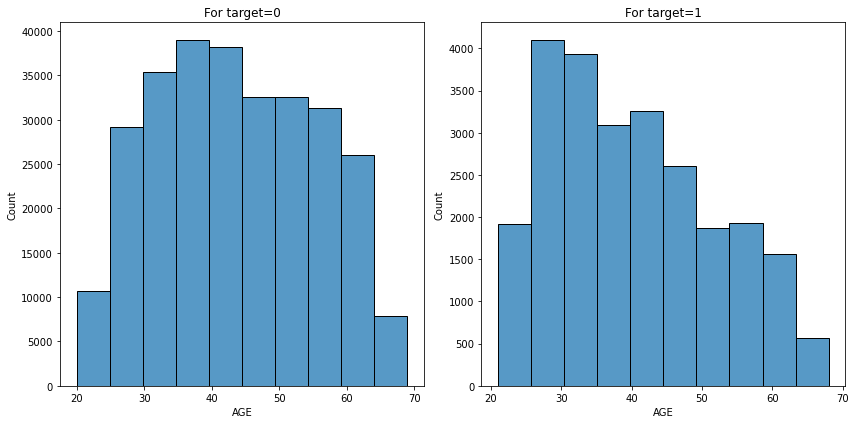

In [149]:
#Plotting histogram for 'AGE' for each target value
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.histplot(inp0_t0.AGE,bins=10)
plt.title('For target=0')

#compare
plt.subplot(1,2,2)
sns.histplot(inp0_t1.AGE,bins=10)
plt.title('For target=1')
plt.show()

In [ ]:
#From above graph we can observe that most of the loans are defaulted by people aged between 25 and 40


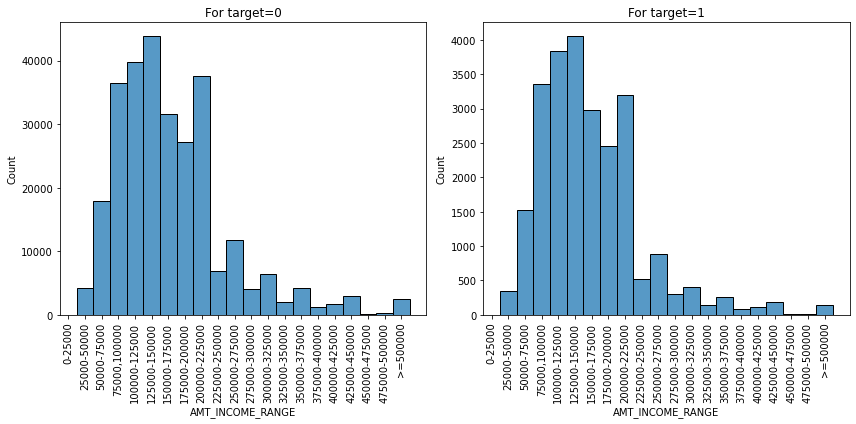

In [157]:
#Plotting histogram for 'AMT_INCOME_RANGE' for each target value
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.histplot(inp0_t0['AMT_INCOME_RANGE'])
plt.title('For target=0')
plt.xticks(rotation=90)
#compare
plt.subplot(1,2,2)
sns.histplot(inp0_t1['AMT_INCOME_RANGE'])
plt.title('For target=1')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#From above graph we can observe that most of the loans are applied by people
#whose income is between 125000 and 150000

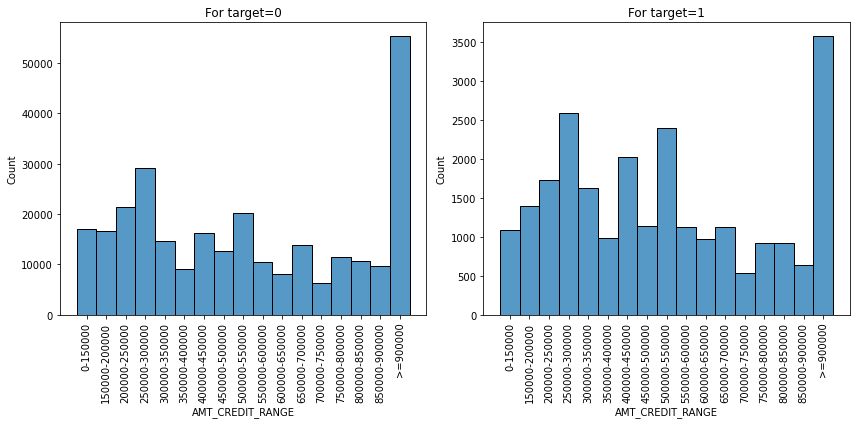

In [158]:
#Plotting histogram for 'AMT_CREDIT_RANGE' for each target value
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.histplot(inp0_t0['AMT_CREDIT_RANGE'])
plt.title('For target=0')
plt.xticks(rotation=90)
#compare
plt.subplot(1,2,2)
sns.histplot(inp0_t1['AMT_CREDIT_RANGE'])
plt.title('For target=1')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#From above graph we can observe that most of the loans are applied by people
#has credit amount greater than or equal to 900000

In [ ]:
#UNIVARIATE ANALYSIS FOR NUMERICAL VARIABLES

In [170]:
#Defining function for boxplot for comparision
def boxplot2(v):
    plt.figure(figsize = (12,6))

    plt.subplot(1,2,1)
    sns.boxplot(inp0_t0[v])
    plt.title('For target=0')
    plt.xticks(rotation=90)
    #compare
    plt.subplot(1,2,2)
    sns.boxplot(inp0_t1[v])
    plt.title('For target=1')
    plt.xticks(rotation=90)
    plt.show()


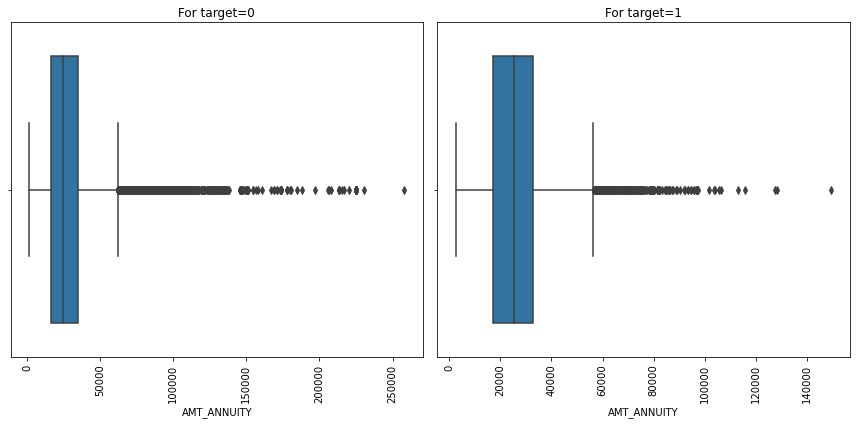

In [171]:
boxplot2('AMT_ANNUITY')

In [370]:
#From above graph, we can say that clients who have 
#AMT_ANNUITY between 20000-40000 are most likely to default

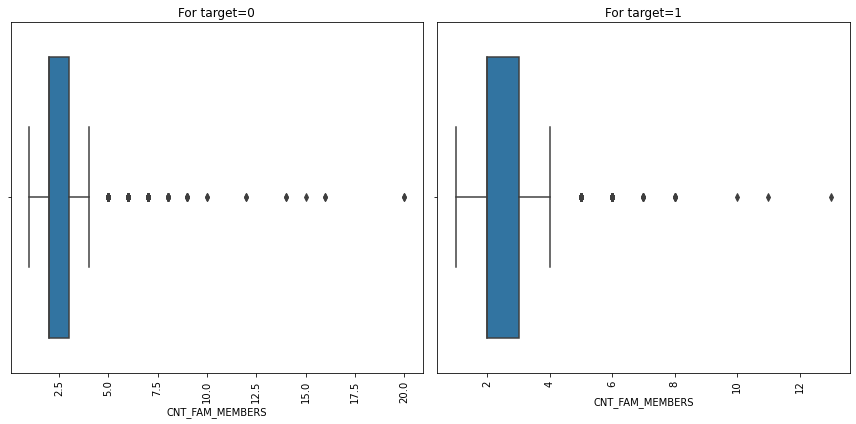

In [197]:
boxplot2('CNT_FAM_MEMBERS')

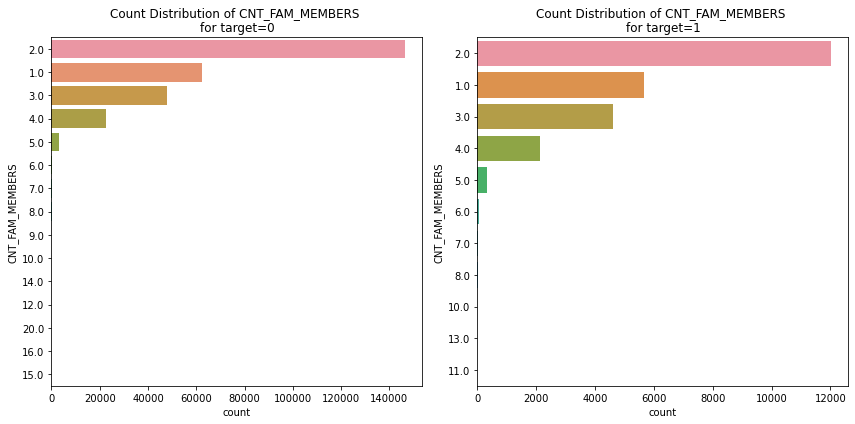

In [198]:
#From above graph, we are unable to obtain conclusive results therefore plotting a countplot
count_plot('CNT_FAM_MEMBERS')

# BIVARIATE ANALYSIS FOR TARGET VALUE =1

In [262]:
#Defining a function for graph between categorical vs categorical variable
def cat_cat(a,b):
    plt.figure(figsize = (12,7))

    sns.countplot(x=a,data=inp0_t1, palette='rainbow',hue=b)
    plt.title("Count of clients for "+a+" \nseparated by "+b+" for target 1")
    plt.xticks(rotation=90)
    plt.show() 

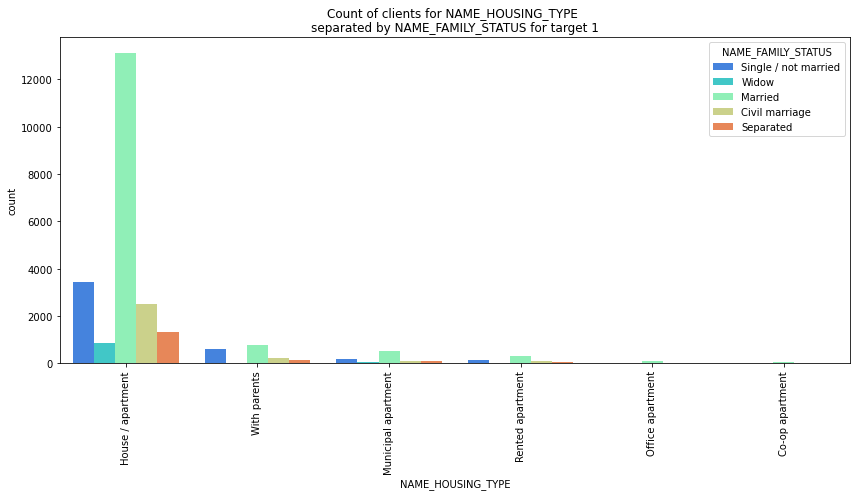

In [263]:
#NAME_HOUSING_TYPE VS. NAME_FAMILY_STATUS
cat_cat('NAME_HOUSING_TYPE','NAME_FAMILY_STATUS')
#We can observe from the graph that people who are married and have their own house/apartment are more likely to default compared to others

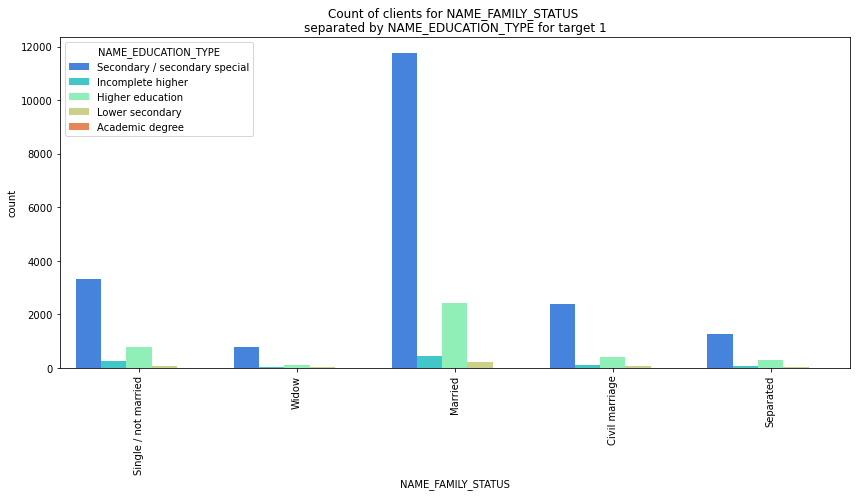

In [264]:
#NAME_FAMILY_STATUS VS. NAME_EDUCATION_TYPE
cat_cat('NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE')
#We can observe from the graph that people who have secondary/secondary level of education 
#and are married are more likely to default compared to others

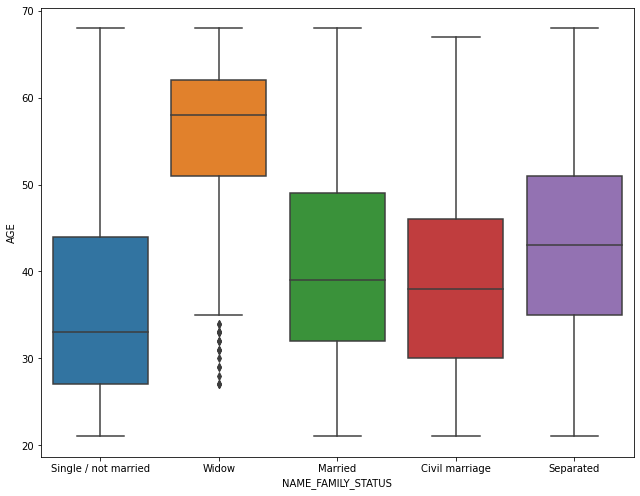

In [261]:
#NAME_FAMILY_STATUS VS. AGE
##Plotting a bar plot 
plt.figure(figsize=[9,7])
sns.boxplot(inp0_t1['NAME_FAMILY_STATUS'], inp0_t1.AGE)
plt.show()
#We can observe that people who are widow and have age>50 are more likely to default

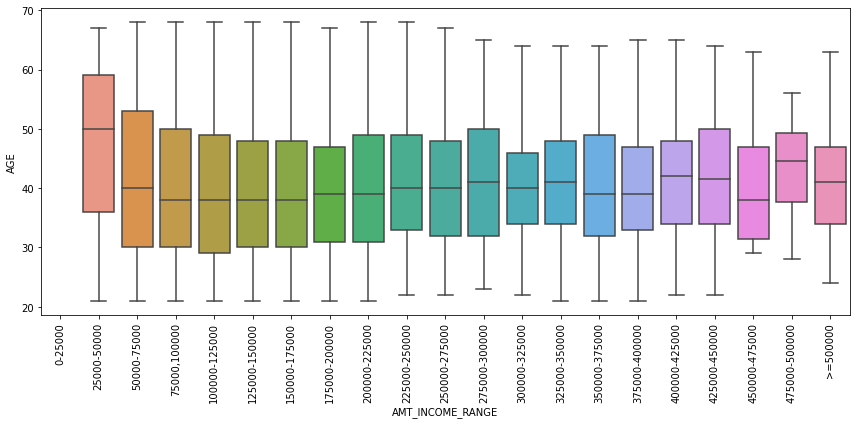

In [255]:
#AGE VS. AMT_INCOME_TOTAL
##Plotting a bar plot
sns.boxplot(data=inp0_t1, x='AMT_INCOME_RANGE', y='AGE')
plt.xticks(rotation=90)
plt.show()
#We can observe that people who have income between 25000-50000 and have age>50 are more likely to default

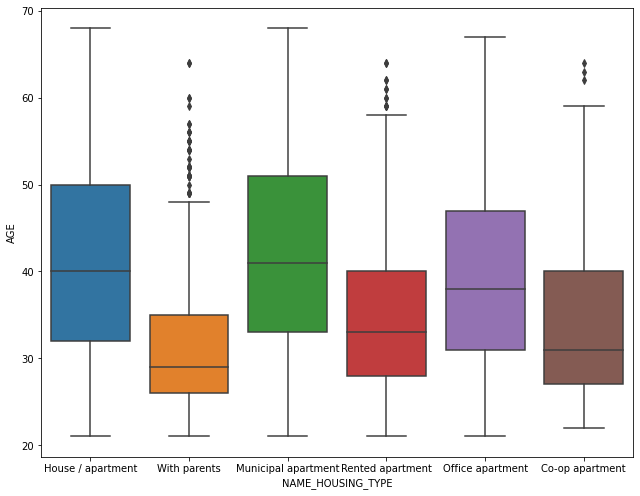

In [248]:
#inp0_t1.groupby(['NAME_HOUSING_TYPE'])['AGE'].mean().plot.bar()
##Plotting a bar plot
plt.figure(figsize=[9,7])
sns.boxplot(inp0_t1['NAME_HOUSING_TYPE'], inp0_t1.AGE)
plt.show()
#We can observe that people who live in municipal apartment or own house/apartment
#and have age>40 are more likely to default

# MUTIVARIATE ANALYSIS FOR EACH TARGET VALUE

In [301]:
list_num=['CNT_CHILDREN','AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','YEARS_EMPLOYED','CNT_FAM_MEMBERS','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

In [304]:
#Finding correlation for target value=0
t0_corr=inp0_t0[list_num].corr()
t0_corr

,CNT_CHILDREN,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_EMPLOYED,CNT_FAM_MEMBERS,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
CNT_CHILDREN,1.000000,0.020909,-0.000559,-0.024363,-0.245173,0.878571,0.021587,0.072193,0.070988,-0.002193,-0.002125
AMT_ANNUITY,0.020909,1.000000,0.776421,0.120977,-0.104979,0.075789,-0.005679,0.001516,0.010577,-0.022160,-0.023052
AMT_GOODS_PRICE,-0.000559,0.776421,1.000000,0.103826,-0.068527,0.062763,-0.024879,-0.016761,0.001285,-0.020731,-0.022910
REGION_POPULATION_RELATIVE,-0.024363,0.120977,0.103826,1.000000,-0.007193,-0.023425,-0.048217,-0.041516,-0.013502,0.005409,0.001808
YEARS_EMPLOYED,-0.245173,-0.104979,-0.068527,-0.007193,1.000000,-0.238300,-0.092841,-0.258124,-0.221391,0.019396,0.016398
CNT_FAM_MEMBERS,0.878571,0.075789,0.062763,-0.023425,-0.238300,1.000000,0.013828,0.072802,0.078843,-0.003923,-0.005410
REG_CITY_NOT_LIVE_CITY,0.021587,-0.005679,-0.024879,-0.048217,-0.092841,0.013828,1.000000,0.435514,0.031165,0.005126,0.005457
REG_CITY_NOT_WORK_CITY,0.072193,0.001516,-0.016761,-0.041516,-0.258124,0.072802,0.435514,1.000000,0.830381,-0.000480,0.001014
LIVE_CITY_NOT_WORK_CITY,0.070988,0.010577,0.001285,-0.013502,-0.221391,0.078843,0.031165,0.830381,1.000000,-0.003687,-0.002506
DEF_30_CNT_SOCIAL_CIRCLE,-0.002193,-0.022160,-0.020731,0.005409,0.019396,-0.003923,0.005126,-0.000480,-0.003687,1.000000,0.859371


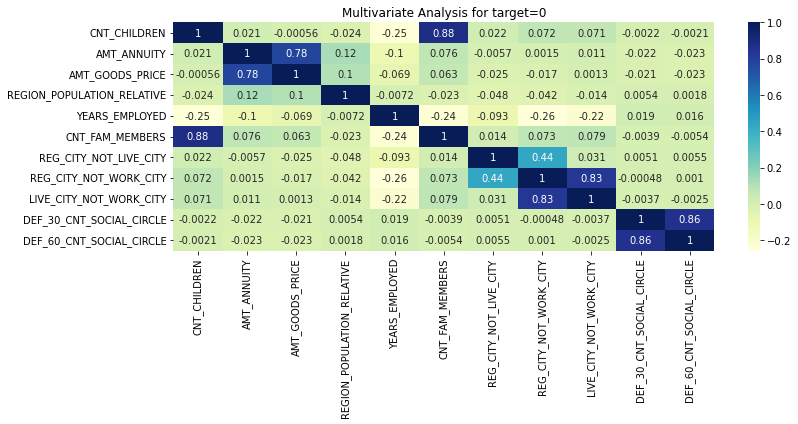

In [306]:
#Constructing a heatmap for target value=0
sns.heatmap(t0_corr, cmap="YlGnBu", annot=True)
plt.title('Multivariate Analysis for target=0')
plt.show()

In [307]:
#Finding correlation for target value=1
t1_corr=inp0_t1[list_num].corr()
t1_corr

,CNT_CHILDREN,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_EMPLOYED,CNT_FAM_MEMBERS,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
CNT_CHILDREN,1.000000,0.031257,-0.008111,-0.031975,-0.192866,0.885484,-0.001174,0.046115,0.053515,0.001520,-0.005039
AMT_ANNUITY,0.031257,1.000000,0.752295,0.071690,-0.081213,0.075711,-0.005745,0.001997,0.009902,-0.021794,-0.026966
AMT_GOODS_PRICE,-0.008111,0.752295,1.000000,0.076053,0.006650,0.047367,-0.034085,-0.038915,-0.016703,-0.021379,-0.025822
REGION_POPULATION_RELATIVE,-0.031975,0.071690,0.076053,1.000000,0.015528,-0.030163,-0.059718,-0.052369,-0.020428,0.025824,0.018199
YEARS_EMPLOYED,-0.192866,-0.081213,0.006650,0.015528,1.000000,-0.186516,-0.088186,-0.245841,-0.198499,0.003059,0.005275
CNT_FAM_MEMBERS,0.885484,0.075711,0.047367,-0.030163,-0.186516,1.000000,-0.005472,0.046153,0.061316,0.007165,-0.000714
REG_CITY_NOT_LIVE_CITY,-0.001174,-0.005745,-0.034085,-0.059718,-0.088186,-0.005472,1.000000,0.472052,-0.010954,0.011012,0.012044
REG_CITY_NOT_WORK_CITY,0.046115,0.001997,-0.038915,-0.052369,-0.245841,0.046153,0.472052,1.000000,0.778540,-0.005876,-0.004945
LIVE_CITY_NOT_WORK_CITY,0.053515,0.009902,-0.016703,-0.020428,-0.198499,0.061316,-0.010954,0.778540,1.000000,-0.016896,-0.019667
DEF_30_CNT_SOCIAL_CIRCLE,0.001520,-0.021794,-0.021379,0.025824,0.003059,0.007165,0.011012,-0.005876,-0.016896,1.000000,0.869016


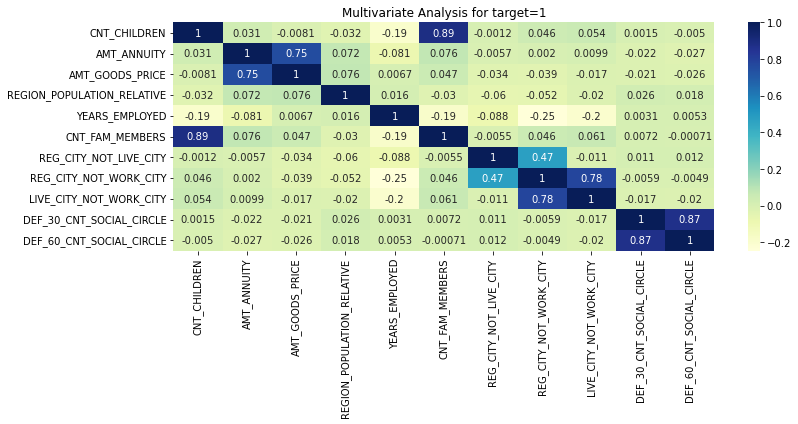

In [308]:
#Constructing a heatmap for target value=1
sns.heatmap(t1_corr, cmap="YlGnBu", annot=True)
plt.title('Multivariate Analysis for target=1')
plt.show()

In [ ]:
#From above heatmaps for we can conclude that:
#1.CNT_CHILDREN has most positive correlation with CNT_FAM_MEMBERS, 
#this maybe because count of family members includes number of children

#2.YEARS_EMPLOYED has slight negative correlation with AMT_ANNUITY 
#this shows that clients who worked for less years have greater value of AMT_ANNUITY

#3. CNT_FAMILY has most positive correlation with AMT_ANNUITY other than CNT_CHILDREN
#this maybe because clients with big family may require more loan amount

#4. REGION_POPULATION_RELATIVE has positive correlation=0.12 with AMT_ANNUITY in target=0 and 
#positive correlation=0.072 with AMT_ANNUITY in target=1 this shows that more populated areas are
#likely to payback loan compared to others

#5. REG_CITY_NOT_WORK_CITY has negative correlation with YEARS_EMPLOYED 
#this shows that client who lives in city other than their hometown 
#are most likely to have started working recently.



# DATA READING AND DATA UNDERSTANDING OF PREVIOUS APPLICATION DATA

In [267]:
#reading data set of application in inp0.
inp1= pd.read_csv("previous_application.csv")

In [268]:
#checking shape of inp1
inp1.shape

(1670214, 37)

In [269]:
#getting brief idea of column names
inp1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [270]:
#checking info
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [271]:
#printing first 5 columns of dataframe
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING FOR PREVIOUS APPLICATION DATASET

In [272]:
#checking missing values in all columns
inp1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [273]:
#Calculating value 40% of data
0.4*1670214

668085.6000000001

In [274]:
#finding number of columns which have more than 40% data missing
null_col1= inp1.isnull().sum()
null_col1=null_col1[null_col1.values>(0.4*1670214)]
len(null_col1)

11

In [275]:
null_col1

AMT_DOWN_PAYMENT              895844
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64

In [276]:
l1=list(null_col1.index)

In [277]:
#dropping columns which have more than 40% data missing with the help of list created
inp1.drop(labels=l1,axis=1,inplace=True)

In [278]:
#verifying shape of inp1
inp1.shape

(1670214, 26)

In [279]:
#checking list of columns to find out unwanted columns
inp1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [280]:
#making a list of unwanted columns
l2=['AMT_ANNUITY','AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','NAME_CLIENT_TYPE','NAME_PRODUCT_TYPE','SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY','CNT_PAYMENT','NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

In [281]:
#dropping columns which are unwanted with the help of list created
inp1.drop(labels=l2,axis=1,inplace=True)

In [282]:
#verifying shape of inp1
inp1.shape

(1670214, 12)

In [283]:
#checking again for missing values
inp1.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_APPLICATION           0
AMT_CREDIT                1
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
NAME_PAYMENT_TYPE         0
CODE_REJECT_REASON        0
NAME_GOODS_CATEGORY       0
NAME_PORTFOLIO            0
CHANNEL_TYPE              0
dtype: int64

In [284]:
#HANDLING MISSING VALUE IN AMT_CREDIT
#checking data type of AMT_CREDIT and decribing it
inp1.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [285]:
#Replacing missing values in AMT_CREDIT with median 
med3=inp1['AMT_CREDIT'].median()
inp1['AMT_CREDIT'].fillna(med3,inplace=True)

In [286]:
#checking for null values in AMT_CREDIT
inp1['AMT_CREDIT'].isnull().sum()

0

In [288]:
#CHECKING FOR DISGUISED MISSING VALUES
#finding number of unique values in each column
inp1.nunique().sort_values()

NAME_CONTRACT_TYPE              4
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
NAME_PORTFOLIO                  5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
AMT_CREDIT                  86803
AMT_APPLICATION             93885
SK_ID_CURR                 338857
SK_ID_PREV                1670214
dtype: int64

In [289]:
#Forming a list of categorical columns 
cat_columns2=['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE','CODE_REJECT_REASON','NAME_CASH_LOAN_PURPOSE','NAME_GOODS_CATEGORY']

In [290]:
len(cat_columns2)

8

In [291]:
#checking for disguised missing values such as blank strings,"NA", "XX", "999", etc in categorical variables
for c in cat_columns2:
    print('.....................\n',c,'\n.....................')
    print(inp1[c].value_counts())

.....................
 NAME_CONTRACT_TYPE 
.....................
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
.....................
 NAME_CONTRACT_STATUS 
.....................
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64
.....................
 NAME_PAYMENT_TYPE 
.....................
Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64
.....................
 NAME_PORTFOLIO 
.....................
POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64
.....................
 CHANNEL_TYPE 
.....................
Credit and cash offices       719968
Co

In [ ]:
#Since there are many disguised missing values,we can check for it again after merging the both datasets

# MERGING BOTH DATASETS

In [325]:
#Merging application dataset and previous application dataset
merge_df=pd.merge(left=inp0,right=inp1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [326]:
#printing head of merged dataset
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Consumer loans,179055.0,179055.0,XAP,Approved,XNA,XAP,Vehicles,POS,Stone
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Cash loans,900000.0,1035882.0,XNA,Approved,XNA,XAP,XNA,Cash,Credit and cash offices
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer loans,337500.0,348637.5,XAP,Approved,Cash through the bank,XAP,Furniture,POS,Stone
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer loans,68809.5,68053.5,XAP,Approved,Cash through the bank,XAP,Consumer Electronics,POS,Country-wide
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Consumer loans,24282.0,20106.0,XAP,Approved,Cash through the bank,XAP,Mobile,POS,Regional / Local


In [327]:
#printing list of columns 
merge_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'AGE',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPEx', 'AMT_APPLICATION', 'AMT_CREDITx',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
      

In [313]:
#Making list of unwanted columns
rlist=['CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT_', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','YEARS_REGISTRATION', 'YEARS_ID_PUBLISH','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','SK_ID_PREV','NAME_CONTRACT_TYPEx', 'AMT_APPLICATION', 'AMT_CREDITx','NAME_PAYMENT_TYPE','NAME_PORTFOLIO']

In [328]:
#dropping columns which are unwanted with the help of list created
merge_df.drop(labels=rlist,axis=1,inplace=True)

In [329]:
#Checking shape of merged dataset
merge_df.shape

(1413701, 17)

In [330]:
#Checking for missing values
merge_df.isnull().sum()

SK_ID_CURR                0
TARGET                    0
NAME_CONTRACT_TYPE_       0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
AGE                       0
YEARS_EMPLOYED            0
ORGANIZATION_TYPE         0
AMT_INCOME_RANGE          0
AMT_CREDIT_RANGE          0
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
CODE_REJECT_REASON        0
NAME_GOODS_CATEGORY       0
CHANNEL_TYPE              0
dtype: int64

In [317]:
#Checking for disguised values which were in previous application dataset
clist=['NAME_CONTRACT_STATUS','CHANNEL_TYPE','CODE_REJECT_REASON','NAME_CASH_LOAN_PURPOSE','NAME_GOODS_CATEGORY']

In [331]:
#checking for disguised missing values such as blank strings,"NA", "XX", "999", etc in categorical variables
for c in clist:
    print('.....................\n',c,'\n.....................')
    print(merge_df[c].value_counts())

.....................
 NAME_CONTRACT_STATUS 
.....................
Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64
.....................
 CHANNEL_TYPE 
.....................
Credit and cash offices       600342
Country-wide                  423062
Stone                         183508
Regional / Local               92472
Contact center                 58891
AP+ (Cash loan)                49624
Channel of corporate sales      5396
Car dealer                       406
Name: CHANNEL_TYPE, dtype: int64
.....................
 CODE_REJECT_REASON 
.....................
XAP       1145533
HC         145984
LIMIT       47773
SCO         32636
CLIENT      22771
SCOFR       10875
XNA          4378
VERIF        3079
SYSTEM        672
Name: CODE_REJECT_REASON, dtype: int64
.....................
 NAME_CASH_LOAN_PURPOSE 
.....................
XAP                                 786937
XNA                               

In [332]:
#Dropping rows which have values= XAP,XNA in NAME_CASH_LOAN_PURPOSE
merge_df=merge_df.drop(merge_df[merge_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
merge_df=merge_df.drop(merge_df[merge_df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [334]:
merge_df.shape

(59413, 17)

In [335]:
#We can drop columns NAME_GOODS_CATEGORY and CODE_REJECT_REASON since there are more disguised missing
#values and also because they are not important since they do not provide much information
merge_df.drop(labels=['NAME_GOODS_CATEGORY','CODE_REJECT_REASON'],axis=1,inplace=True)

In [336]:
merge_df.shape

(59413, 15)

In [337]:
merge_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE',
       'YEARS_EMPLOYED', 'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE',
       'AMT_CREDIT_RANGE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'CHANNEL_TYPE'],
      dtype='object')

In [338]:
#Defining a function for bivariate analysis with target value
def bplot(e,s):
    plt.figure(figsize = (12,7))

    sns.countplot(x=e,data=merge_df, palette='rainbow',hue=s)
    plt.title("Count of clients for "+e+" \nseparated by "+s)
    plt.xticks(rotation=90)
    plt.show()

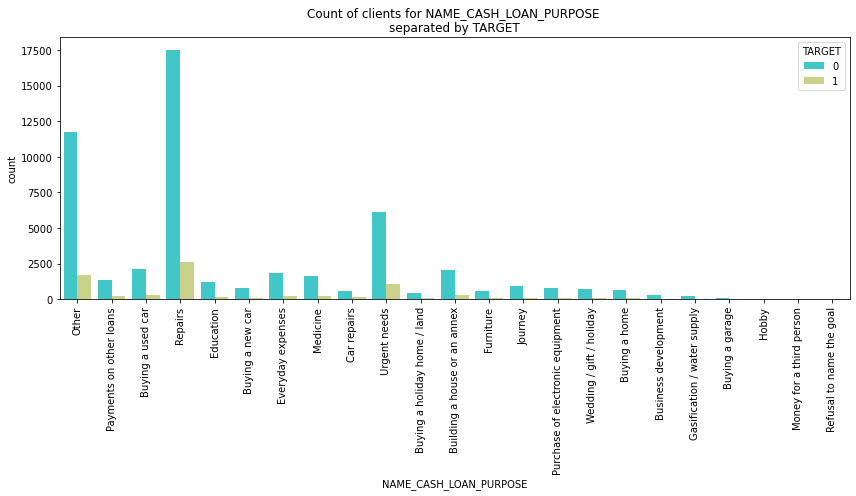

In [339]:
#Performing bivariate analysis for NAME_CASH_LOAN_PURPOSE for each target value
bplot('NAME_CASH_LOAN_PURPOSE','TARGET')
#From below graph we can observe that most loans are applied for purpose of repairs and therefore the 
#chances of default also increases

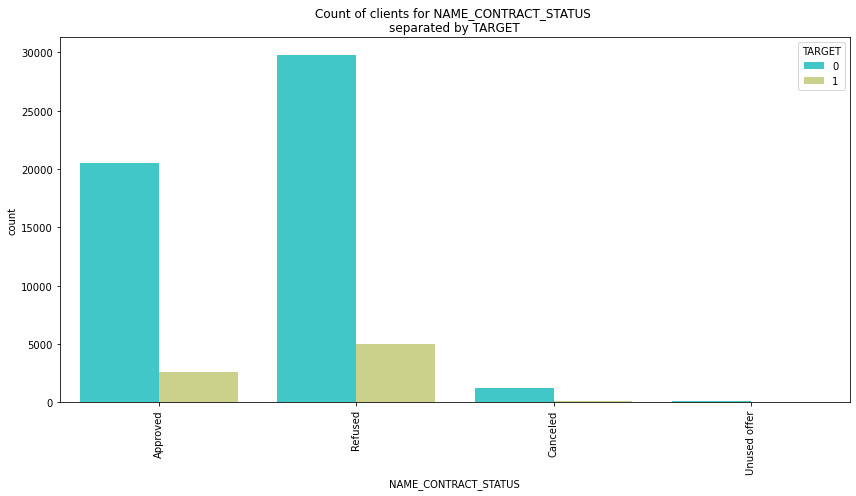

In [340]:
#Performing bivariate analysis for 'NAME_CONTRACT_STATUS' for each target value
bplot('NAME_CONTRACT_STATUS','TARGET')
#From below graph we can observe that loans which were previously refused have higher chances of 
#default compared to those whose previous application was approved

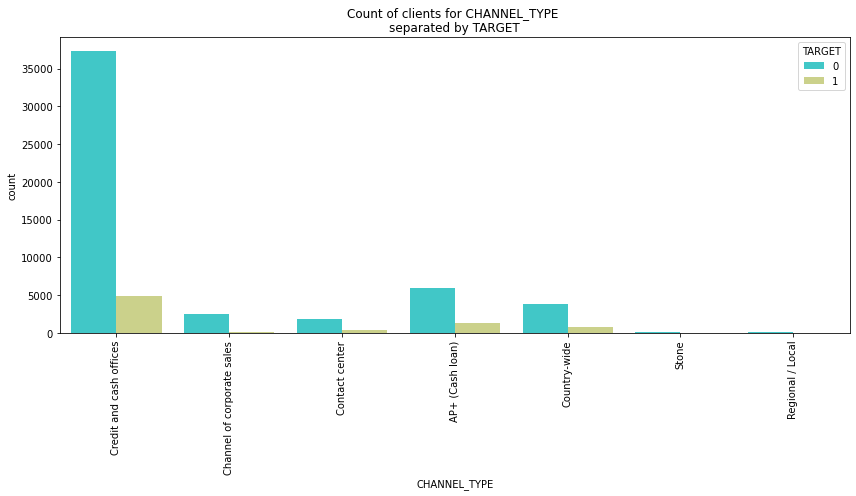

In [341]:
#Performing bivariate analysis for 'CHANNEL_TYPE' for each target value
bplot('CHANNEL_TYPE','TARGET')
#From below graph we can observe that loans which were previously through cash/credit offices have
#higher chances of default compared to other categories

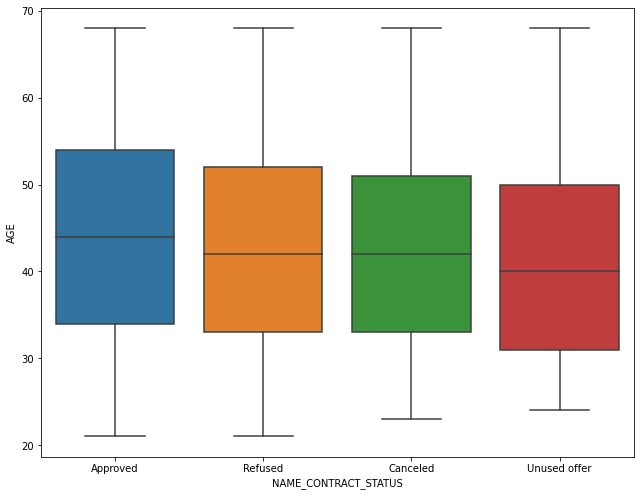

In [342]:
#NAME_CONTRACT_STATUS VS. AGE
##Plotting a bar plot 
plt.figure(figsize=[9,7])
sns.boxplot(merge_df['NAME_CONTRACT_STATUS'], merge_df.AGE)
plt.show()
#There is no significant observation

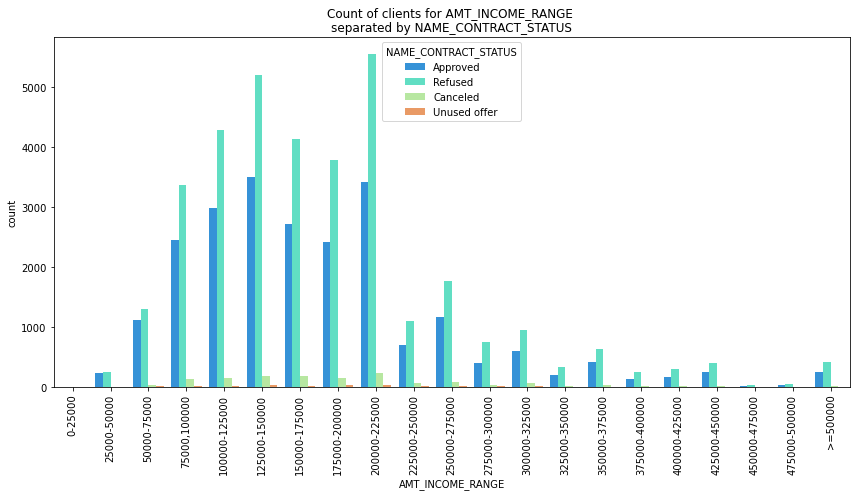

In [343]:
#Performing bivariate analysis for 'NAME_CONTRACT_STATUS' vs. AMT_INCOME_RANGE
bplot('AMT_INCOME_RANGE','NAME_CONTRACT_STATUS')
#From below graph we can observe that clients who have income between range 200000-225000 are also the
#ones whose previous application was refused

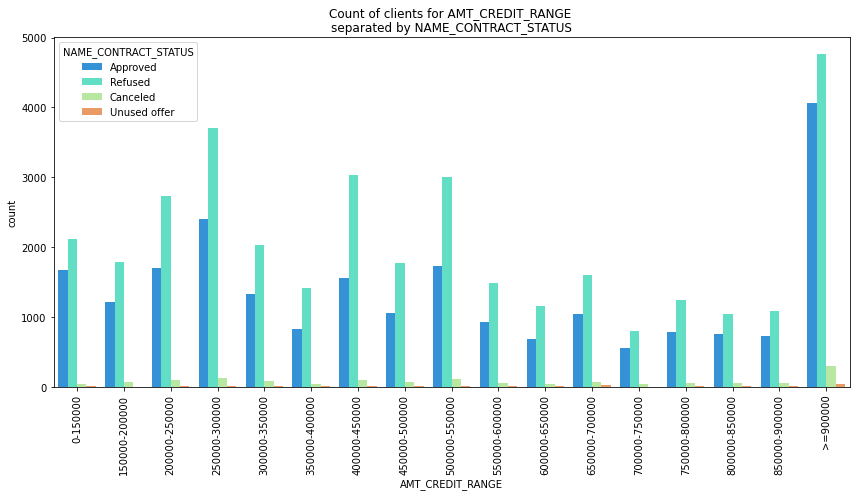

In [367]:
#Performing bivariate analysis for 'NAME_CONTRACT_STATUS' vs. AMT_CREDIT_RANGE
bplot('AMT_CREDIT_RANGE','NAME_CONTRACT_STATUS')
#From below graph we can observe that clients who have credit >=900000 are also the
#ones whose previous application was refused